## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [40]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [42]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [43]:
converted = df.query('converted == 1')
converted.user_id.nunique() / df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [44]:
temp1 = df.query('group == "treatment" and landing_page != "new_page"')
temp2 = df.query('group == "control" and landing_page == "new_page"')
temp1.count() + temp2.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [45]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [46]:
df2 = pd.DataFrame()
temp = df.query('group == "treatment" and landing_page == "new_page"')
temp3 = df2.append(temp, ignore_index = True)
temp1 = df.query('group == "control" and landing_page == "old_page"')
temp3 = temp3.append(temp1, ignore_index = True)
temp3
df2 = temp3

In [47]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
df2.user_id.nunique(), df.count()

(290584, user_id         294478
 timestamp       294478
 group           294478
 landing_page    294478
 converted       294478
 dtype: int64)

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
df2[df2.user_id.duplicated()== True]

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [51]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [52]:
df2.drop(df2.query('timestamp == "2017-01-09 05:37:58.781806"').index, inplace = True)
df2.count()

user_id         290584
timestamp       290584
group           290584
landing_page    290584
converted       290584
dtype: int64

In [53]:
df2[df2.user_id.duplicated()== True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [54]:
df2.query('converted == 1').user_id.count() / df2.user_id.count() 

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [55]:
dfcontrol = df2.query('group == "control"')
dfcontrol.query('converted == 1').user_id.count() / dfcontrol.user_id.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [56]:
dftreatment = df2.query('group == "treatment"')
dftreatment.query('converted == 1').user_id.count() / dftreatment.user_id.count()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [57]:
df2.query('landing_page == "new_page"').user_id.count() / df2.user_id.count() 

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

We have performed a series of logical operations which will help get our answer, however the difference above is marginal. We should use techniques like bootstraping and sampling run it several thousands of times to be sure.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis : pnew <= pold
<br>Alternative hypothesis : pnew > pold

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [58]:
pnew = df2.query('converted == 1').user_id.count()/ df2.user_id.count()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [59]:
pold = df2.query('converted == 1').user_id.count()/ df2.user_id.count()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [60]:
newtreatmentdf = df2.query('group == "treatment"')
nnew = newtreatmentdf.user_id.count()
nnew

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [61]:
newcontroldf = df2.query('group == "control"')
nold = newcontroldf.user_id.count()
nold

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [196]:
#new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
new_page_converted = np.random.binomial(1, pnew, nnew)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [197]:
#old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))
old_page_converted = np.random.binomial(1, pold,nold)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [198]:
new_page_converted = new_page_converted[:145274]
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.001796605036000945

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [185]:
#----------------------------------------
# The reason why I ran a loop of 1000 instead of 10000 and sample size of 1000 instead of size variable below
# Is that it takes forever to load
#----------------------------------------
p_diffs =[]
size = df.shape[0]
for _ in range(10000):
    #new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
    #old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))
    #obs_diff = new_page_converted.mean() - old_page_converted.mean()
    #p_diffs.append(obs_diff)
    new_page_converted = np.random.binomial(1, pnew, nnew)
    old_page_converted = np.random.binomial(1, pold, nold)
    new_page_p = new_page_converted.mean()
    old_page_p = old_page_converted.mean()
    p_diffs.append(new_page_p - old_page_p)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

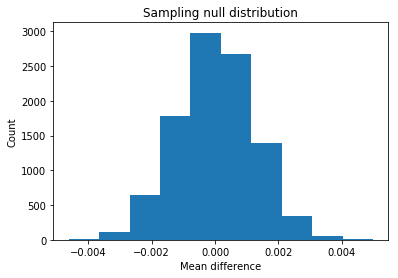

In [199]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel('Mean difference');
plt.ylabel('Count');
plt.title('Sampling null distribution');

In [200]:
treatmentctr = dftreatment.query('converted == 1').user_id.count() / dftreatment.user_id.count()
controlctr = dfcontrol.query('converted == 1').user_id.count() / dfcontrol.user_id.count()
obsctr = treatmentctr.mean() - controlctr.mean()
obsctr

-0.0015782389853555567

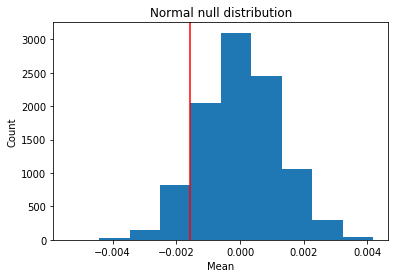

In [201]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
temp = plt.hist(null_vals);
plt.axvline(obsctr, c='red');
plt.xlabel('Mean');
plt.ylabel('Count');
plt.title('Normal null distribution');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [202]:
(p_diffs > obsctr).mean()

0.904

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


<br>pvalue is quite high.
<br>Also on the basis of above observations, we fail to reject the null hypothesis, i.e, old page is better than new page.
<br>We should keep in mind that this decision is based on the data provided.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [181]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"' and 'converted == 1').user_id.count()
convert_new = df2.query('group == "treatment"' and 'converted == 1').user_id.count()
n_old =  df2.query('group == "control"').user_id.count()
n_new = df2.query('group == "treatment"').user_id.count()

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])

#Number of individuals who received each page
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()
n_old = int(n_old)
n_new = int(n_new)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [204]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative ="larger")
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

As observed p-value is almost same compared to the one we calculated as well.
<br>As Z_score is between -1.96 and +1.96 , we cannot reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [153]:
df3 = df2.copy()
df3['intercept'] = 1
df3[['new_page','old_page']] = pd.get_dummies(df3['landing_page'])

In [155]:
df3['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [156]:
logistic = sm.Logit(df3['converted'], df3[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [157]:
results = logistic.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366122
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            1
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:               1.918e-07
Time:                        19:15:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.8399
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9951      0.008   -246.852      0.000      -2.011      -1.979
ab_page       -0.0023      0.011     -0.202      0.840      -0.025       0.020
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

P-value associated with ab_page is 0.84. 

Here the null hypothesis would be null: pnew - pold =0, alternative pnew - pold != 0. Hence the difference in pvalue as the hypothesis are also different.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The only other variable that we haven't factored in from our data is the timestamp. We can factor in particular hours, intervals of day like afternoon etc, or even day wise mon, tues, or simply weekday and weekend as well.

<br> While this will provide better insights, factoring all this will make it very complex.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [170]:
country = pd.read_csv('countries.csv')
df4 = df3.copy()
df4 = df4.merge(country, on = 'user_id', how = 'left')
df4.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,0,CA


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [175]:
country.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [176]:
df4[['CA','UK','US']] = pd.get_dummies(df4['country'])

In [181]:
logistic = sm.Logit(df4['converted'], df4[['intercept','new_page', 'CA','UK']])

In [182]:
results = logistic.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290583
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            3
Date:                Sat, 02 Mar 2019   Pseudo R-squ.:               2.322e-05
Time:                        19:38:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1761
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
new_page      -0.0149      0.011     -1.306      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.129      -0.093       0.012
UK             0.0099      0.013      0.743      0.458      -0.016       0.036
==============================================================================
"""

In [183]:
1/np.exp(-0.0149),np.exp(-0.0408),np.exp(0.0099)

(1.0150115583846535, 0.96002111497165088, 1.0099491671175422)

Here we consider that all the other factors are constant when changing one.
<br>For every unit of page decrease, convert is 1.015 times more likely.
<br>For every unit of CA decrease, convert is 0.96 times more likely.
<br>For every unit of UK increase, convert if 1.009 times more likely.

<a id='conclusions'></a>
## Conclusion

On the basis of above operations I would not recommend the new page to be implemented.
<br> However this does not mean necessarily mean that the page is bad. The mean difference wasn't obvious to reject the new page. Probably more data over time and factoring in other variables might helpful us understand what factors affects a user most and make a better page.

